In [3]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.0 MB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 49.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 48.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 52.7 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pyspark
import geopandas
import pandas as pd
import re
import matplotlib.pyplot as plt
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col,split,concat,size

In [2]:
data = sc.textFile("s3://geocluster/lat_longs.txt")
df=data.map(lambda x: (re.split('[\ ]',x)))
#splitting using desired regex

In [3]:
df=df.filter(lambda x:len(x)<=3)

In [4]:
df1 = sqlContext.createDataFrame(data=df)
df1=df1.select(concat('_1').alias("latitude"),concat('_2').alias("longitude"),concat('_3').alias("page"))
#converting to dataframe and naming it

In [5]:
df1.show(20)

[Stage 1:>                                                          (0 + 1) / 1]

+-------------------+------------------+--------------------+
|           latitude|         longitude|                page|
+-------------------+------------------+--------------------+
|               36.7| 3.216666666666667|<http://dbpedia.o...|
|               42.5|1.5166666666666666|<http://dbpedia.o...|
| 12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
| -8.833333333333334|13.333333333333334|<http://dbpedia.o...|
| 41.333333333333336|              19.8|<http://dbpedia.o...|
|  34.53333333333333| 69.13333333333334|<http://dbpedia.o...|
| 40.416666666666664|49.833333333333336|<http://dbpedia.o...|
|  39.93333333333333| 32.86666666666667|<http://dbpedia.o...|
|  52.36666666666667|               4.9|<http://dbpedia.o...|
|              50.46|              2.13|<http://dbpedia.o...|
| 17.116666666666667|            -61.85|<http://dbpedia.o...|
|  57.04638888888889| 9.919166666666667|<http://dbpedia.o...|
|              56.15|10.216666666666667|<http://dbpedia.o...|
|       

In [6]:
df1=df1.na.drop()

In [10]:
df1=df1.filter(df1.latitude!=0)
df1=df1.filter(df1.longitude!=0)
#selecting only the one which are not equal to zero

In [11]:
df1=df1.toPandas();
df1.to_csv('s3://geocluster/DBPedia.csv',header=None)
#converting to csv

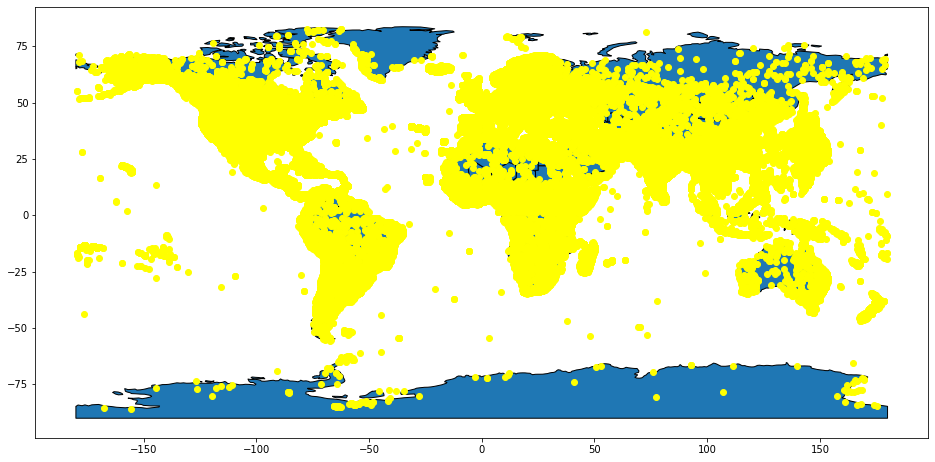

In [13]:
gdf = geopandas.GeoDataFrame(
    df1, geometry=geopandas.points_from_xy(df1.longitude, df1.latitude))


world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

# PLOTTING
gdf.plot(ax=ax,color='yellow')

plt.show()